In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_temp = pd.read_csv('data_temperature.csv')
data_temp.head()

,"May 1, 2024","May 2, 2024","May 3, 2024","May 4, 2024","May 5, 2024","May 6, 2024","May 7, 2024","May 8, 2024","May 9, 2024","May 10, 2024",...,"May 22, 2024","May 23, 2024","May 24, 2024","May 25, 2024","May 26, 2024","May 27, 2024","May 28, 2024","May 29, 2024","May 30, 2024","May 31, 2024"
0,21.202526,24.338933,26.490243,26.217513,27.207826,24.972327,24.481427,22.052501,21.505542,26.924724,...,29.301410,20.179230,29.687681,24.026668,29.919942,28.681632,21.046047,26.244618,20.530005,27.358316
1,24.247705,21.710761,29.597477,28.356216,24.140819,25.550695,21.867948,21.297016,20.186209,21.636393,...,26.315708,20.836484,20.508394,20.545584,22.428529,22.043496,29.233152,21.275898,20.525063,21.807229
2,29.163367,24.842497,20.902030,23.210441,25.676509,22.179322,22.872417,22.328782,28.379434,22.741980,...,27.796696,26.950178,21.480933,21.362222,27.229028,20.542166,21.757301,22.731825,29.209440,25.518785
3,28.475023,25.566483,23.314678,29.222119,26.921222,20.022570,21.406409,29.146448,22.613927,24.756516,...,27.563232,24.398839,22.742447,22.048978,21.497113,22.123616,25.908479,20.824971,23.215018,28.297795
4,24.114250,27.404758,21.304670,24.141123,27.800563,25.929723,25.011114,25.492722,23.732622,20.109292,...,20.318264,24.642063,20.004916,25.742428,27.986698,26.739247,22.105478,29.672746,20.010400,28.838778


In [4]:
data_voltage = pd.read_csv('data_voltage.csv')
data_voltage.head()

,"May 1, 2024","May 2, 2024","May 3, 2024","May 4, 2024","May 5, 2024","May 6, 2024","May 7, 2024","May 8, 2024","May 9, 2024","May 10, 2024",...,"May 22, 2024","May 23, 2024","May 24, 2024","May 25, 2024","May 26, 2024","May 27, 2024","May 28, 2024","May 29, 2024","May 30, 2024","May 31, 2024"
0,220.529019,219.374792,216.517064,215.362539,216.241368,219.247217,215.322480,219.562355,220.252817,215.289939,...,217.651034,224.741276,219.499131,219.746684,215.074782,218.319484,223.084349,224.821622,221.186764,223.349899
1,221.459185,219.149313,224.299883,222.970429,215.154217,218.671007,216.085214,217.962397,217.405090,222.216738,...,222.485808,219.632458,216.204720,221.757232,223.575019,216.807516,220.129935,218.979194,219.980206,217.065787
2,220.213237,215.728140,217.419187,217.114015,221.494970,218.996832,222.554858,224.055045,219.834053,218.225041,...,217.694321,216.642452,217.141059,223.038130,224.506563,221.226853,215.445173,220.233076,217.082780,219.604433
3,219.585793,219.506041,223.364874,222.429482,224.092468,222.082309,217.933726,216.770504,217.938607,217.220145,...,217.786314,219.896692,223.346791,216.822159,219.415037,224.662884,219.129351,221.792936,221.842433,216.295033
4,219.376719,223.210175,219.531842,222.341279,223.226845,218.410397,220.801320,215.588521,217.502133,224.055691,...,215.851737,223.743631,222.432311,224.300731,219.855666,222.755932,223.688843,223.224571,223.226796,222.902207


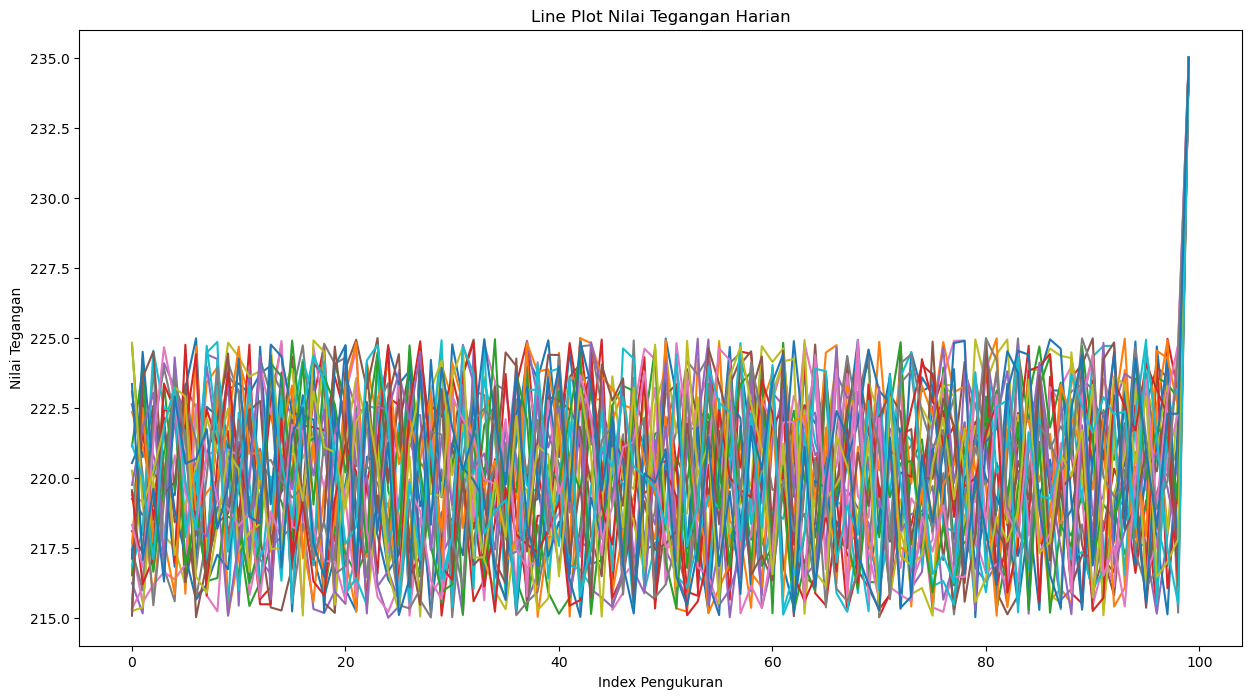

In [23]:
plt.figure(figsize=(15, 8))
for i in range(data_voltage.shape[1]):
    plt.plot(data_voltage.index, data_voltage.iloc[:, i], label=f'Hari {i+1}')
plt.title('Line Plot Nilai Tegangan Harian')
plt.xlabel('Index Pengukuran')
plt.ylabel('Nilai Tegangan')
#plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.show()

Kita tentukan data abnormal adalah nilai tegangan +- 5% nilai tegangan normal

In [40]:
lower_bound_volt = int(0.95*220)
upper_bound_volt = int(1.05*220)
outliers = (data_voltage < lower_bound_volt) | (data_voltage > upper_bound_volt)

# Menghitung jumlah nilai outlier
num_outliers = outliers.sum().sum()
total_values = data_voltage.size
percentage_outliers = (num_outliers / total_values) * 100
print(f"Jumlah nilai outlier: {num_outliers}")
print(f"Persentase nilai outlier: {percentage_outliers:.2f}%")

Jumlah nilai outlier: 31
Persentase nilai outlier: 1.00%


Sepertinya semua outlier ada di data indeks ke-31 setiap hari, mari kita lihat

In [41]:
data_voltage.tail()

,"May 1, 2024","May 2, 2024","May 3, 2024","May 4, 2024","May 5, 2024","May 6, 2024","May 7, 2024","May 8, 2024","May 9, 2024","May 10, 2024",...,"May 22, 2024","May 23, 2024","May 24, 2024","May 25, 2024","May 26, 2024","May 27, 2024","May 28, 2024","May 29, 2024","May 30, 2024","May 31, 2024"
95,215.878934,224.517969,220.790191,219.189969,217.423348,222.639340,219.537829,223.722146,223.166850,217.575590,...,217.922040,220.000238,224.067239,220.436417,221.015324,223.508285,221.423467,222.916700,224.682858,220.952472
96,224.688813,222.196351,215.766620,215.235215,215.147763,223.949526,222.672707,220.583077,222.033373,218.403610,...,224.537793,221.796614,223.149569,220.898740,220.229421,218.920219,218.888324,216.460148,221.474990,218.253494
97,221.192490,218.239942,221.678237,224.962008,217.959571,223.574584,220.252008,220.055807,218.004253,216.847160,...,224.271677,221.410358,222.225552,219.640015,223.038767,222.960850,219.882133,216.999154,217.429621,222.279038
98,219.100887,220.853306,219.266300,223.051754,220.779384,216.361131,224.783792,221.070019,222.934408,219.808222,...,222.532286,219.107677,216.129854,217.648733,216.588654,224.754288,224.490693,217.807536,215.501946,222.290416
99,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000


Ternyata betul, abnormal terjadi pada pengambilan data terakhir setiap harinya

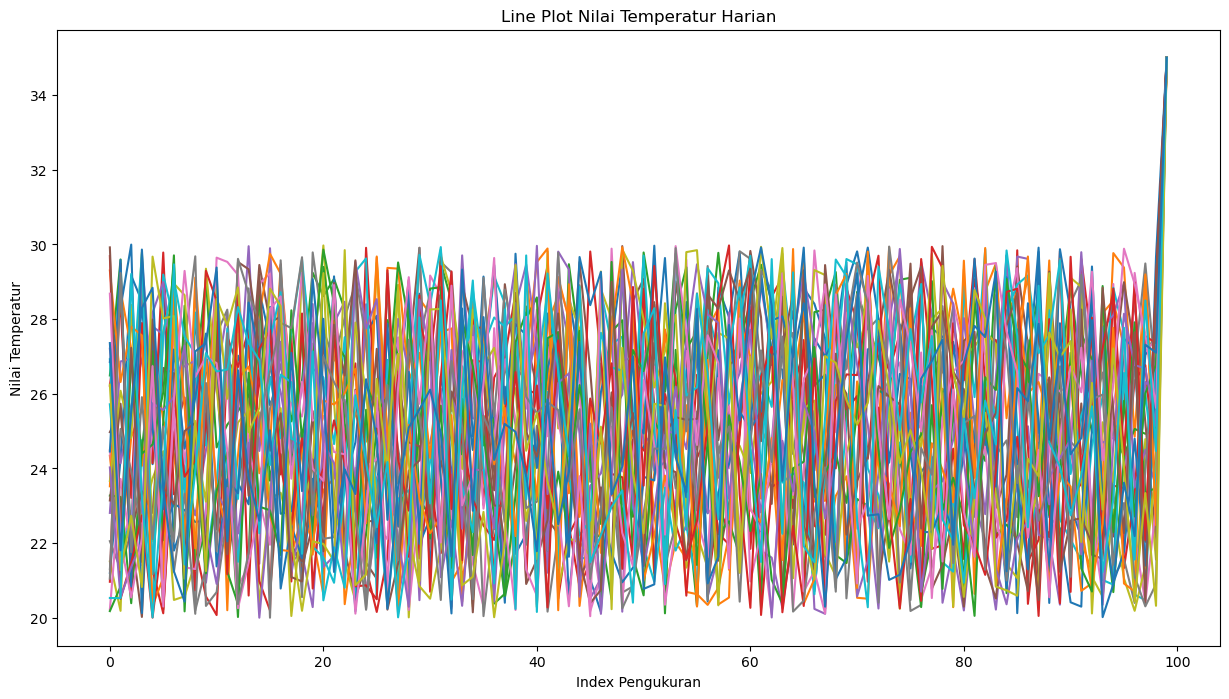

In [42]:
plt.figure(figsize=(15, 8))
for i in range(data_temp.shape[1]):
    plt.plot(data_temp.index, data_temp.iloc[:, i], label=f'Hari {i+1}')
plt.title('Line Plot Nilai Temperatur Harian')
plt.xlabel('Index Pengukuran')
plt.ylabel('Nilai Temperatur')
#plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.show()

sepertinya temperatur juga sama, data ke 100 setiap harinya terjadi abnormal

In [44]:
lower_bound_temp,Upper_bound_temp = 24,25
outliers_temp = (data_temp < lower_bound_temp) | (data_temp > Upper_bound_temp)

# Menghitung jumlah nilai outlier
num_outliers = outliers_temp.sum().sum()
total_values = data_temp.size
percentage_outliers = (num_outliers / total_values) * 100
print(f"Jumlah nilai outlier: {num_outliers}")
print(f"Persentase nilai outlier: {percentage_outliers:.2f}%")

Jumlah nilai outlier: 2777
Persentase nilai outlier: 89.58%


In [36]:
data_voltage.describe()

,"May 1, 2024","May 2, 2024","May 3, 2024","May 4, 2024","May 5, 2024","May 6, 2024","May 7, 2024","May 8, 2024","May 9, 2024","May 10, 2024",...,"May 22, 2024","May 23, 2024","May 24, 2024","May 25, 2024","May 26, 2024","May 27, 2024","May 28, 2024","May 29, 2024","May 30, 2024","May 31, 2024"
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,220.739966,220.509087,220.171695,220.322986,219.552080,220.158098,220.129028,220.479042,220.904584,219.918806,...,220.592183,219.921350,219.916970,220.129903,220.131548,219.592861,220.086387,219.971406,220.388841,220.179629
std,3.080408,3.050433,3.068353,3.434652,3.313662,3.203007,3.438466,3.273165,3.091418,3.208404,...,3.202901,3.150182,3.347802,3.268070,3.254181,3.268547,3.097786,3.126202,3.136987,3.311668
min,215.281975,215.043550,215.142519,215.045483,215.001996,215.054832,215.076191,215.013673,215.073945,215.252507,...,215.353894,215.136963,215.092122,215.077348,215.023825,215.155863,215.334369,215.042223,215.192808,215.098685
25%,218.573406,218.216183,217.861411,217.116011,216.566915,217.673148,217.004523,218.372665,218.931011,217.263092,...,217.852540,217.535677,216.991173,217.485865,217.432141,217.048655,217.792669,217.294297,217.938722,217.205758
50%,221.059142,220.506694,220.116275,220.275848,219.574854,219.798679,219.912474,220.434071,220.846626,219.854385,...,220.839274,219.623611,219.747242,219.857295,219.637068,218.858624,220.033610,220.260655,220.203342,220.259368
75%,222.950530,222.577825,222.425268,222.990760,222.210510,222.221567,222.996670,222.928305,223.263879,221.979693,...,222.863976,221.851928,222.417025,222.452686,222.827244,222.019609,221.959237,221.846698,222.687787,222.400336
max,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
